<a href="https://colab.research.google.com/github/akshaytripathi09/Advertising-Project/blob/main/ADVERTISING_PROJECT_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## STEP 1 - IMPORT DEPENDENCIES

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
## STEP 2 - IMPORT DATA

df = pd.read_csv('Advertising.csv', index_col=0)
df.head(10)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [ ]:
## STEP 3 - DATA ANALYSIS

print(df.dtypes)

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object


In [ ]:
print(df.shape)

(200, 4)


In [ ]:
print(df.describe())

               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


<Axes: >

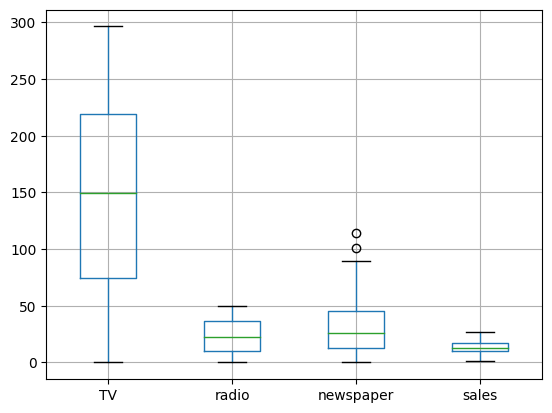

In [ ]:
## STEP 4 - ASSUMPTIONS
## ASSUMPTION 1 - THERE SHOULD BE NO ASSUMPTIONS

df.boxplot()

<Axes: >

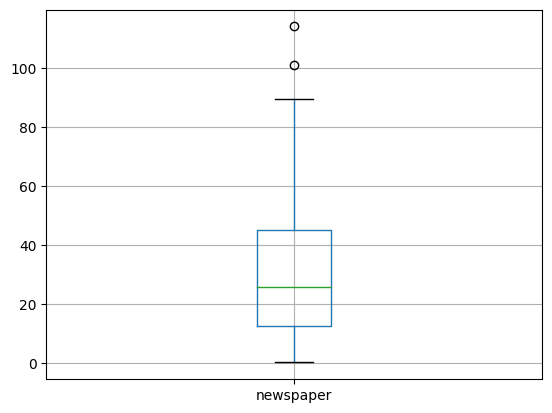

In [ ]:
df.boxplot(column = "newspaper")

In [ ]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [ ]:
## CHECK MISSING VALUES

def check_missing_values(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent= (data.isnull().sum()/data.isnull().count()  * 100).sort_values(ascending=False)
    missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
    return missing_data

In [ ]:
miss = check_missing_values(df)
miss


,Total,Percent
TV,0,0.0
radio,0,0.0
newspaper,0,0.0
sales,0,0.0


<Axes: >

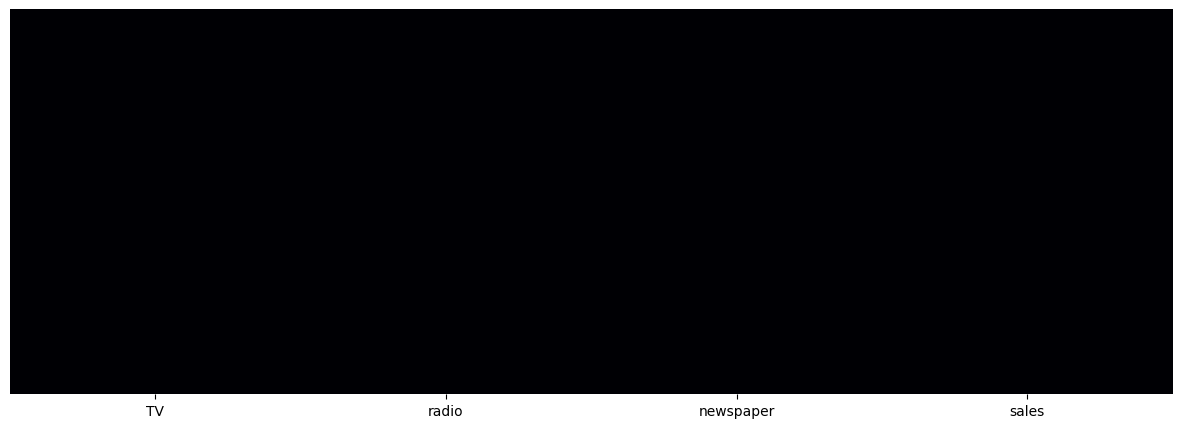

In [ ]:
plt.figure(figsize = (15,5))
sns.heatmap(df.isnull(),cbar = False, yticklabels = False, cmap="magma")

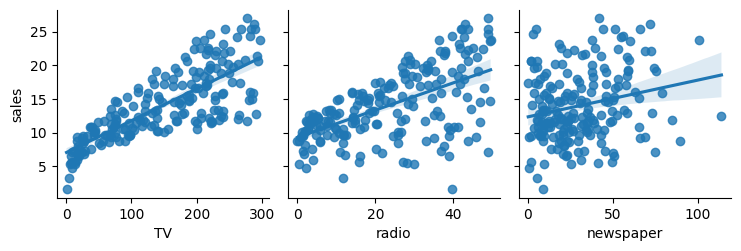

In [ ]:
## ASSUMPTIONS 2 - ASSUMPTIONS OF LINEARITY

sns.pairplot(df,
             x_vars = ["TV","radio","newspaper"],
             y_vars ="sales",
             kind = 'reg')

plt.show()

In [ ]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [ ]:
features_cols = ['TV','radio','newspaper']
x = df[features_cols]
y = df.sales

In [ ]:
x.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [ ]:
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: sales, Length: 200, dtype: float64

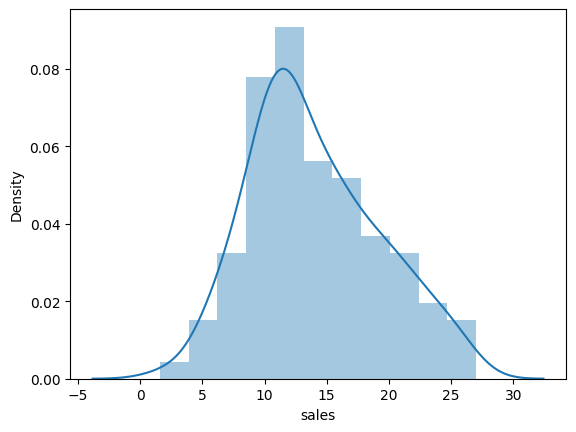

In [ ]:
### ASSUMPTIONS 3 - ASSUMPTIONS OF NORMALITY

sns.distplot(y, hist = True)
plt.show()

<Axes: xlabel='sales', ylabel='Density'>

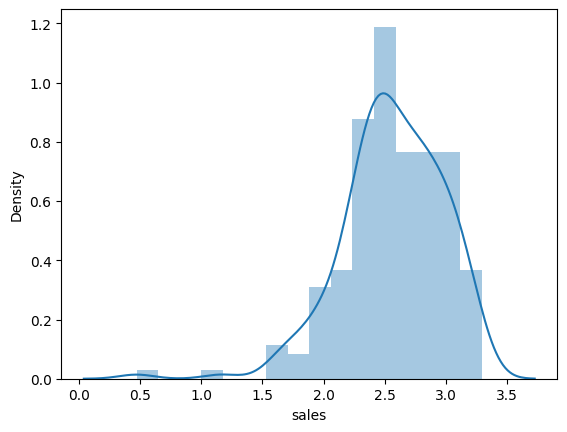

In [ ]:
Y_log = np.log(y)
sns.distplot(Y_log, hist = True)

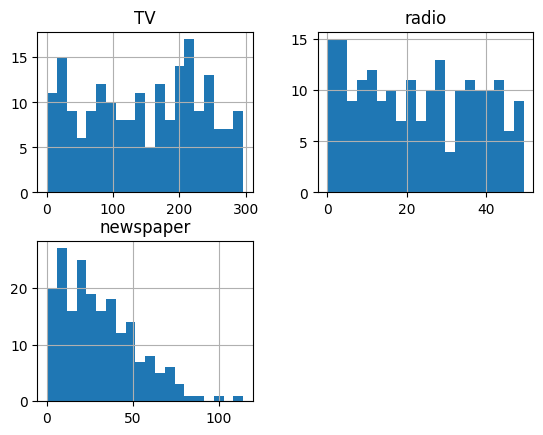

In [ ]:
# Check Hist for all variables


x.hist(bins = 20)
plt.show()

In [ ]:
data_num_skew = x.apply(lambda x: skew(x. dropna()))
data_num_skewed = data_num_skew [(data_num_skew >0.75) | (data_num_skew < -0.75)]
print(data_num_skew)
print(data_num_skewed)


TV          -0.069328
radio        0.093467
newspaper    0.887996
dtype: float64
newspaper    0.887996
dtype: float64


In [ ]:
x[data_num_skewed.index]= np.log1p(x[data_num_skewed.index])

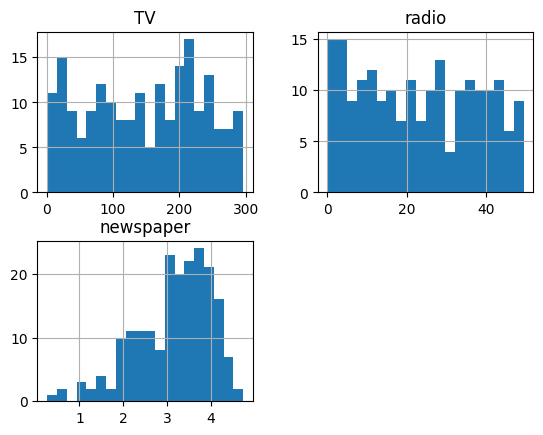

In [ ]:
x.hist(bins = 20)
plt.show()

In [ ]:
## ASSUMPTION 4 - THERE SHOULD BE NO MULTICOLINEARITY IN THE DATA
# PEARSON CORRELATION

corr_df = x.corr(method = "pearson")
print(corr_df)

                 TV     radio  newspaper
TV         1.000000  0.054809   0.030951
radio      0.054809  1.000000   0.251909
newspaper  0.030951  0.251909   1.000000


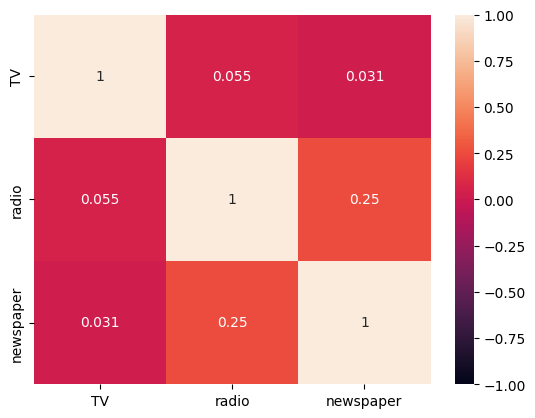

In [ ]:
sns.heatmap(corr_df, vmax= 1.0 , vmin =-1.0, annot=True)
plt.show()

In [ ]:
## CHECK VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()
vif_df["features"]= x.columns
vif_df["VIF Factor"] = [vif(x.values,i) for i in range(x.shape[1])]
vif_df.round(2)



,features,VIF Factor
0,TV,3.39
1,radio,3.63
2,newspaper,5.44


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size =0.2, random_state= 10)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)


In [ ]:
X_train

,TV,radio,newspaper
191,39.5,41.1,1.916923
8,120.2,19.6,2.533697
27,142.9,29.3,2.610070
139,43.0,25.9,3.068053
59,210.8,49.6,3.655840
...,...,...,...
114,209.6,20.6,2.459589
65,131.1,42.8,3.397858
16,195.4,47.7,3.987130
126,87.2,11.8,3.292126


In [ ]:
X_train_scale

array([[0.12110845, 0.82758621, 0.36910949],
       [0.39719466, 0.39148073, 0.50670344],
       [0.4748546 , 0.58823529, 0.52374121],
       [0.13308245, 0.51926978, 0.62591103],
       [0.70715019, 1.        , 0.75703825],
       [0.07765994, 0.663286  , 0.61309872],
       [0.62880602, 0.34279919, 0.5971572 ],
       [0.78002053, 0.168357  , 0.44835052],
       [0.01094766, 0.56389452, 0.777408  ],
       [0.46219637, 0.28397566, 0.67339682],
       [0.1991105 , 0.2494929 , 0.60182933],
       [0.69380773, 0.1643002 , 0.68000727],
       [1.        , 0.73022312, 0.97301989],
       [0.54533014, 0.74036511, 0.41624968],
       [0.79815258, 0.09736308, 0.65505062],
       [0.16900445, 0.03448276, 0.63505936],
       [0.93328772, 0.98580122, 0.77950272],
       [0.66712282, 0.61460446, 0.76272954],
       [0.44543277, 0.09330629, 0.46173972],
       [0.21484776, 0.23123732, 0.75178892],
       [0.05234348, 0.31845842, 0.64384727],
       [0.75846733, 0.16024341, 0.84536828],
       [0.

In [ ]:
from sklearn.linear_model import LinearRegression

# creat a model object
lm = LinearRegression()

# train the model object
lm.fit(X_train_scale, y_train)

LinearRegression()

In [ ]:
print(lm.intercept_)
print(lm.coef_)

3.5777036762562506
[12.78593321  9.51672799 -0.21942783]


In [ ]:
# pair the feature names with the coefficients
print(list(zip(features_cols, lm.coef_)))

[('TV', 12.785933211080344), ('radio', 9.516727993391227), ('newspaper', -0.2194278300878505)]


In [ ]:
# try chaging the value of X
400
X1=290 # tv
X2=100 # radio
X3=10 # newspaper
y_pred_single_data=3.5963760844147785+(12.78240791 *X1)+(9.5053313 *X2)+(-0.19952401*X3)
print(y_pred_single_data)

4659.032559884415


In [ ]:
X_test

,TV,radio,newspaper
60,210.7,29.5,2.332144
6,8.7,48.9,4.330733
21,218.4,27.7,3.996364
199,283.6,42.0,4.207673
53,216.4,41.7,3.703768
20,147.3,23.9,3.000720
163,188.4,18.1,3.280911
56,198.9,49.4,4.110874
70,216.8,43.9,3.339322
3,17.2,45.9,4.252772


In [ ]:
y_pred=lm.predict(X_test_scale)
print(y_pred)

[18.15026866 12.96136899 18.05815332 23.66025079 20.68751041 14.26325872
 14.92774472 21.38847375 21.14752911 12.75788534 23.99735583  7.20632737
 12.30777109 19.22813333 19.41581583 13.44985803 19.62619644  9.24667496
 21.1052867  20.87838433 15.52611251 10.91695579 22.82910679 15.82915597
 17.40742204  8.17170435 11.88738387 12.69866637 21.71275044  7.94920205
 12.49118989 20.43292079  4.71443086  4.72126238 16.7504848  15.74384945
  6.74775596 17.73750244  9.01170001 13.60841593]


In [ ]:
new_df = pd.DataFrame()
new_df = X_test

new_df["Actual Sales"] = y_test
new_df["Predicted Sales"] = y_pred
new_df

,TV,radio,newspaper,Actual Sales,Predicted Sales
60,210.7,29.5,2.332144,18.4,18.150269
6,8.7,48.9,4.330733,7.2,12.961369
21,218.4,27.7,3.996364,18.0,18.058153
199,283.6,42.0,4.207673,25.5,23.660251
53,216.4,41.7,3.703768,22.6,20.687510
20,147.3,23.9,3.000720,14.6,14.263259
163,188.4,18.1,3.280911,14.9,14.927745
56,198.9,49.4,4.110874,23.7,21.388474
70,216.8,43.9,3.339322,22.3,21.147529
3,17.2,45.9,4.252772,9.3,12.757885


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2=r2_score(y_test,y_pred)
print("R Square: ", r2)

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adjusted R Square: ", adjusted_r_squared)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE: ", rmse)


R Square:  0.834801071903532
Adjusted R Square:  0.8322725168816474
RMSE:  2.5929769110930603


In [ ]:
print(min(y))
print(max(y))

1.6
27.0


In [ ]:
new_df["Deviation"] = new_df["Actual Sales"] - new_df["Predicted Sales"]
new_df.to_csv("Advertising_Pred.csv", header=True, index=False)
new_df.head()

,TV,radio,newspaper,Actual Sales,Predicted Sales,Deviation
60,210.7,29.5,2.332144,18.4,18.150269,0.249731
6,8.7,48.9,4.330733,7.2,12.961369,-5.761369
21,218.4,27.7,3.996364,18.0,18.058153,-0.058153
199,283.6,42.0,4.207673,25.5,23.660251,1.839749
53,216.4,41.7,3.703768,22.6,20.687510,1.912490
